## Colorization of Grayscale CIFAR-10 Images using Deep Learning

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from skimage.color import rgb2gray

In [10]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [11]:
# Convert images to grayscale
x_train_gray = np.array([rgb2gray(img) for img in x_train])
x_test_gray = np.array([rgb2gray(img) for img in x_test])

# Normalize the grayscale images
x_train_gray = x_train_gray[..., np.newaxis]
x_test_gray = x_test_gray[..., np.newaxis]
x_train_gray = x_train_gray.astype('float32')/255.
x_test_gray = x_test_gray.astype('float32')/255.

# Normalize the original images
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

## Design and Train an Autoencoder

In [12]:
from keras.models import Model
from keras.layers import Input, Conv2D, UpSampling2D

def build_autoencoder():
  input_img = Input(shape = (32, 32, 1))

  # Encoder
  x = Conv2D(64, (3, 3), activation = 'relu', padding = 'same')(input_img)
  x = Conv2D(64, (3, 3), activation = 'relu', padding = 'same')(x)
  x = Conv2D(128, (3, 3), activation = 'relu', padding = 'same')(x)

  # Decoder
  x = Conv2D(128, (3, 3), activation = 'relu', padding = 'same')(x)
  x = Conv2D(64, (3, 3), activation = 'relu', padding = 'same')(x)
  x = Conv2D(64, (3, 3), activation = 'relu', padding = 'same')(x)
  decoded = Conv2D(3, (3, 3), activation = 'sigmoid', padding = 'same')(x)

  autoencoder = Model(input_img, decoded)
  autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

  return autoencoder

autoencoder = build_autoencoder()
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        640       
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 128)       147584    
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 64)        73792     
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 64)        3692

In [13]:
# Train the autoencoder
autoencoder.fit(x_train_gray, x_train, epochs = 50, batch_size = 128, validation_data = (x_test_gray, x_test))

Epoch 1/50
391/391 [==============================] - 25s 59ms/step - loss: 0.0263 - val_loss: 0.0106
Epoch 2/50
391/391 [==============================] - 23s 58ms/step - loss: 0.0097 - val_loss: 0.0084
Epoch 3/50
391/391 [==============================] - 23s 59ms/step - loss: 0.0081 - val_loss: 0.0076
Epoch 4/50
391/391 [==============================] - 23s 59ms/step - loss: 0.0074 - val_loss: 0.0071
Epoch 5/50
391/391 [==============================] - 23s 59ms/step - loss: 0.0070 - val_loss: 0.0070
Epoch 6/50
391/391 [==============================] - 23s 59ms/step - loss: 0.0069 - val_loss: 0.0066
Epoch 7/50
391/391 [==============================] - 23s 59ms/step - loss: 0.0067 - val_loss: 0.0065
Epoch 8/50
391/391 [==============================] - 23s 59ms/step - loss: 0.0067 - val_loss: 0.0065
Epoch 9/50
391/391 [==============================] - 23s 59ms/step - loss: 0.0065 - val_loss: 0.0064
Epoch 10/50
391/391 [==============================] - 23s 59ms/step - loss: 0.006

## Visualize Gray and Colorized Images

313/313 [==============================] - 2s 5ms/step


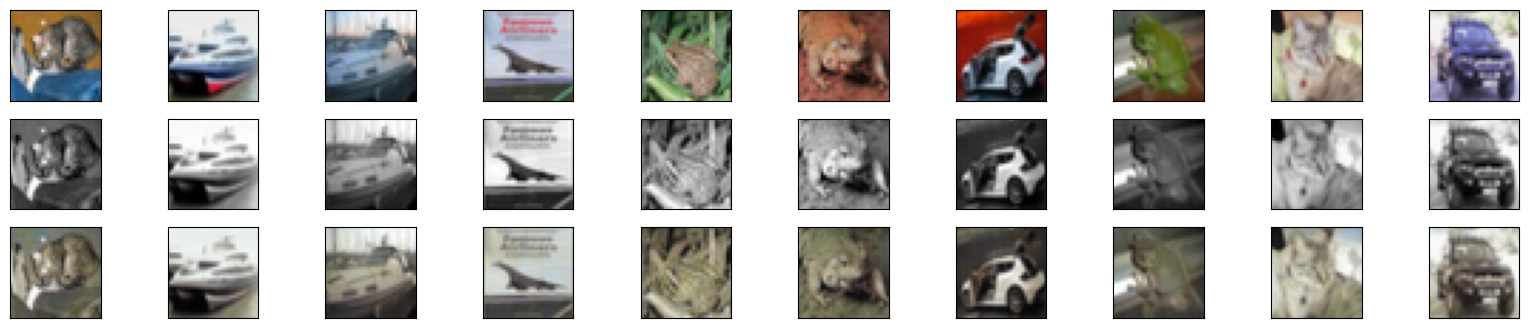

In [14]:
# Predict the colorized images
predicted = autoencoder.predict(x_test_gray)

# Display original, grayscale, and colorized images
n = 10
plt.figure(figsize = (20, 4))
for i in range(n):
  # Display original
  ax = plt.subplot(3, n, i + 1)
  plt.imshow(x_test[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # Display grayscale
  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(x_test_gray[i].reshape(32, 32), cmap = 'gray')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # Display colorized
  ax = plt.subplot(3, n, i + 1 + 2 * n)
  plt.imshow(predicted[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

Downloading...
From: https://drive.google.com/uc?id=1ETstSjlU-z2ebGw1hcLNMDaHUcS32Uy2
To: /content/test.jpg
100%|██████████| 51.6k/51.6k [00:00<00:00, 44.8MB/s]

1/1 [==============================] - 0s 23ms/step


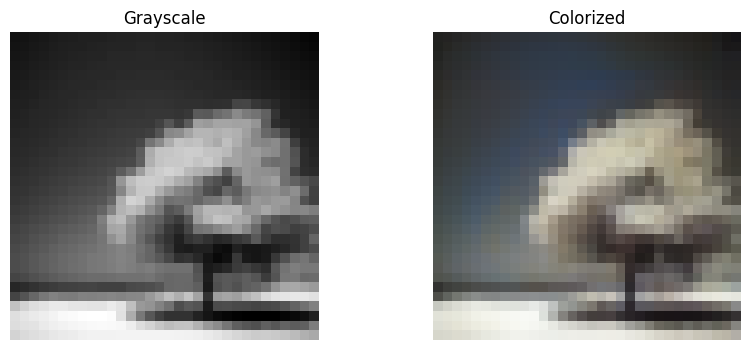

In [15]:
from skimage.io import imread
from skimage.transform import resize
import gdown

# Download image from Google Drive
file_id = '1ETstSjlU-z2ebGw1hcLNMDaHUcS32Uy2'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'test.jpg'
gdown.download(url, output, quiet=False)

# Load and preprocess an external image
external_image = imread(output)
external_image_gray = rgb2gray(external_image)
external_image_gray = resize(external_image_gray, (32, 32, 1))
external_image_gray = external_image_gray.astype('float32') / 255.

# Predict the colorized image
external_image_colorized = autoencoder.predict(external_image_gray[np.newaxis, ...])[0]

# Display the grayscale and colorized external image
plt.figure(figsize=(10, 4))

# Display grayscale
plt.subplot(1, 2, 1)
plt.title("Grayscale")
plt.imshow(external_image_gray.reshape(32, 32), cmap='gray')
plt.axis('off')

# Display colorized
plt.subplot(1, 2, 2)
plt.title("Colorized")
plt.imshow(external_image_colorized)
plt.axis('off')

plt.show()